In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
import os
from beamline34IDC.simulation.facade import Implementors
from beamline34IDC.simulation.facade.focusing_optics_factory import focusing_optics_factory_method
from beamline34IDC.simulation.facade.focusing_optics_interface import Movement

from beamline34IDC.util.shadow.common import \
    plot_shadow_beam_spatial_distribution, get_shadow_beam_spatial_distribution,\
    load_shadow_beam, PreProcessorFiles, EmptyBeamException
import beamline34IDC.optimization.common as opt_common
import beamline34IDC.optimization.movers as movers
from beamline34IDC.util import clean_up
import matplotlib.pyplot as plt
import numpy as np
import scipy
from tqdm import tqdm
#from beamline34IDC.util.redirect_shadow_output import redirected_output

In [3]:
%matplotlib inline

In [4]:
DEFAULT_RANDOM_SEED = 111

In [5]:
work_dir = '/Users/saugat/code/oasys/ML_Control_System/work_directory'
os.chdir(work_dir)
input_beam_path = "primary_optics_system_beam.dat"
#input_beam = load_shadow_beam()

In [6]:
fig_save_path = 'figures/opt_hkb_mot4_only/'

In [7]:
if not os.path.isdir(fig_save_path):
    print("Fig save directory does not exist. Trying to create.")
    os.mkdir(fig_save_path)

In [8]:
move_motors = ['hkb_4']

In [19]:
# Focusing Optics System -------------------------
#with redirected_output():
focusing_system, out_beam = opt_common.reinitialize(input_beam_path=input_beam_path)

7.625219885299723e-05 7.625219885299723e-05


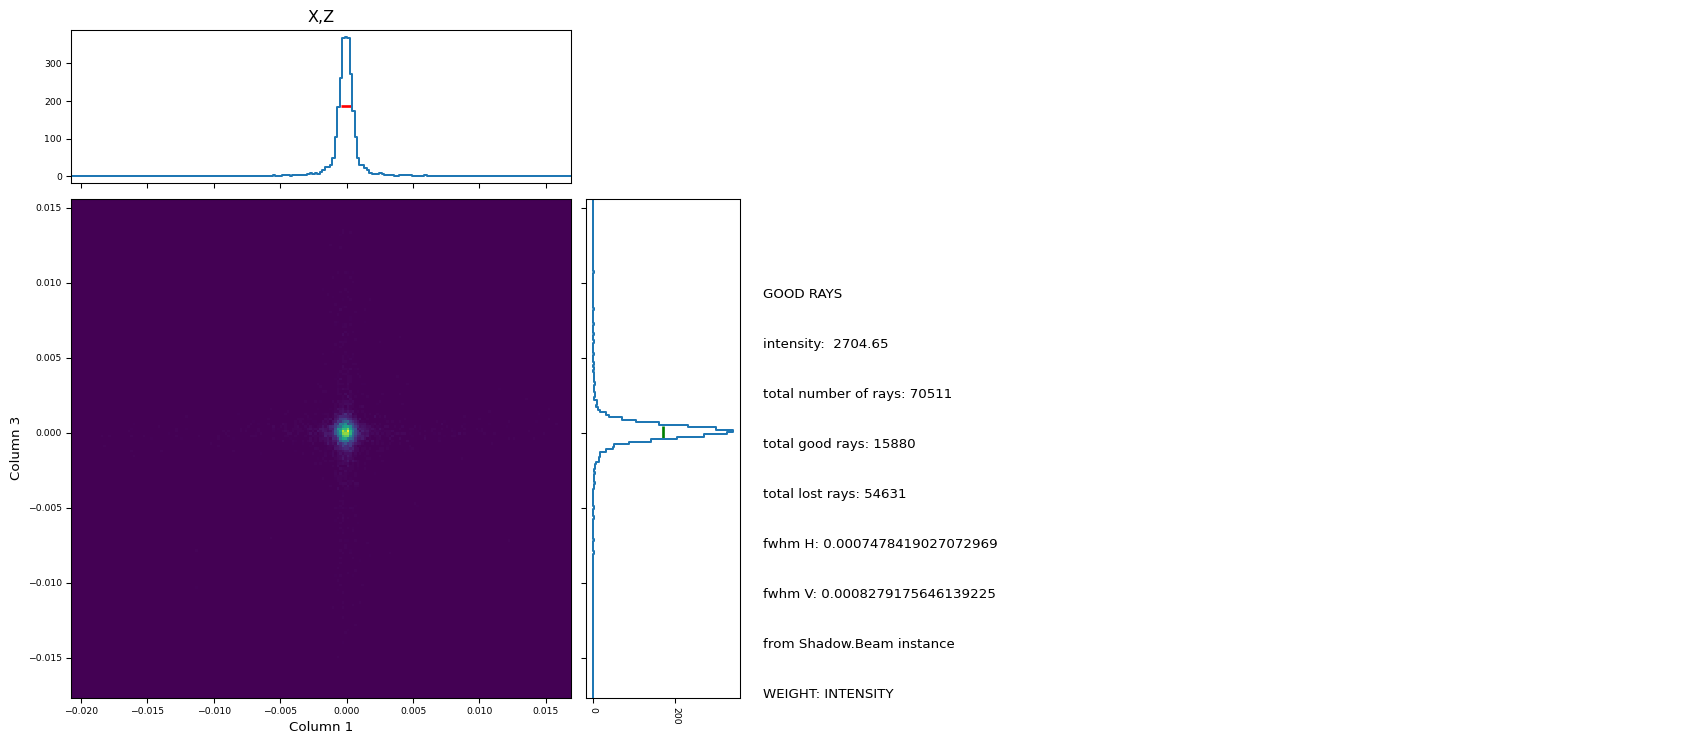

In [20]:
centroid, out_beam, hist, dw = opt_common.getCentroidDistance(focusing_system, random_seed=DEFAULT_RANDOM_SEED)
focusing_system = movers.moveMotors(focusing_system, 'hkb_4', 0.0)
centroid_new, out_beam_new, *_ = opt_common.getCentroidDistance(focusing_system, random_seed=DEFAULT_RANDOM_SEED)

print(centroid, centroid_new)
_ = plot_shadow_beam_spatial_distribution(out_beam_new)

7.625219885299723e-05 0.06114539950198748


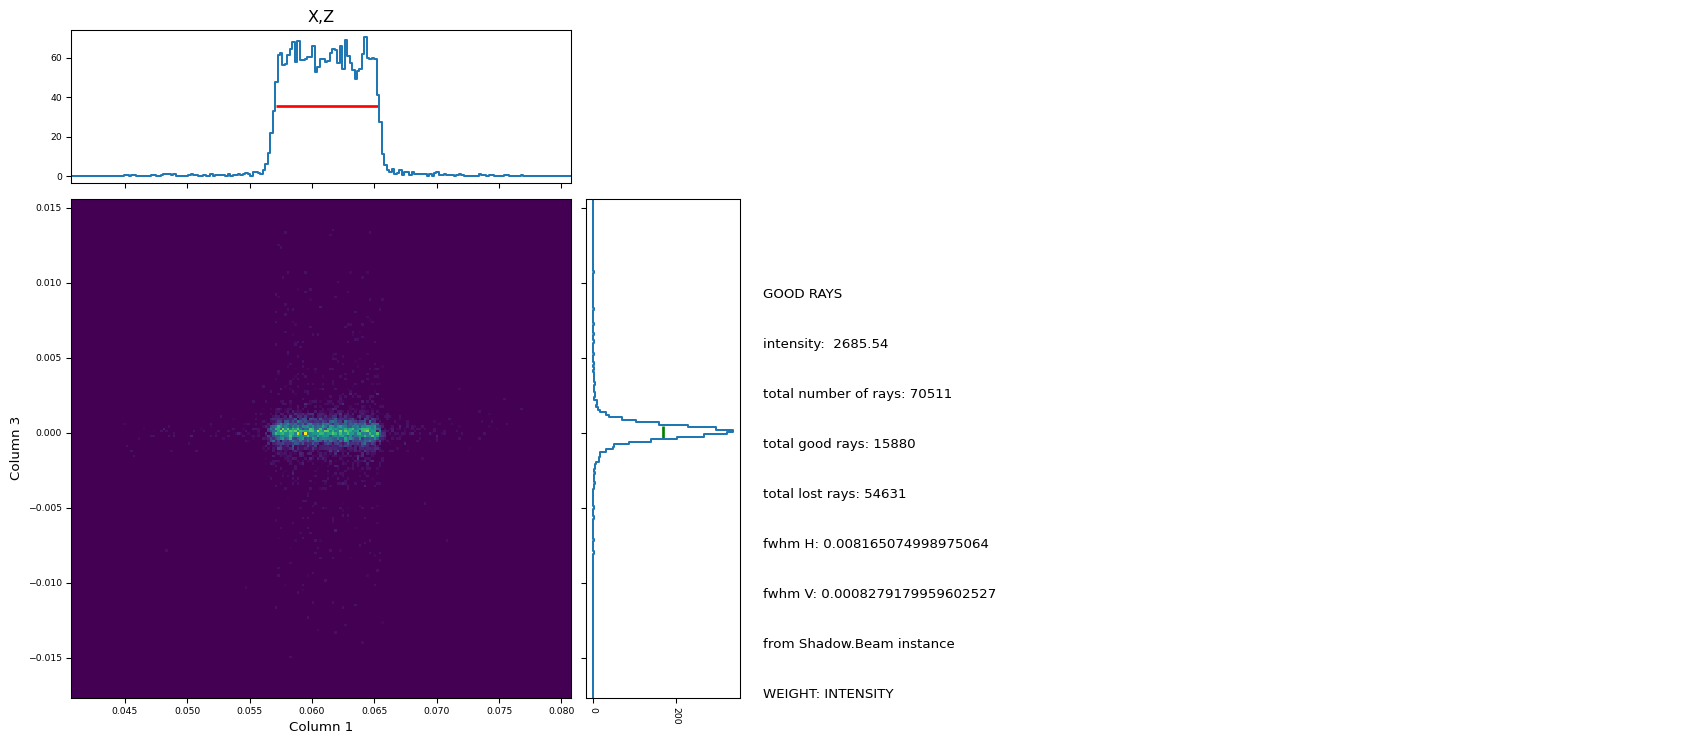

In [46]:
initial_translation = np.random.uniform(-0.14, 0.14)
movers.moveMotors(focusing_system, move_motors, initial_translation, movement='absolute')
centroid_new, out_beam_new, *_ = opt_common.getCentroidDistance(focusing_system, random_seed=DEFAULT_RANDOM_SEED)

print(centroid, centroid_new)
_ = plot_shadow_beam_spatial_distribution(out_beam_new)

In [50]:
focusing_system = movers.moveMotors(focusing_system, move_motors, initial_translation, movement='absolute')

In [51]:
opt_trial = opt_common.OptimizationCommon(focusing_system, 
                                          motor_types=move_motors, 
                                          initial_motor_positions=initial_translation, 
                                          random_seed=DEFAULT_RANDOM_SEED)

In [49]:
%%time
guesses, solution, success = opt_trial.trials(verbose=True)

motors ['hkb_4'] trans [0.] current loss 0.06114539950198748
Initial loss is 0.06114539950198748
motors ['hkb_4'] trans [-0.04727346] current loss 0.10835638097892271
motors ['hkb_4'] trans [-0.00236367] current loss 0.1107171541715083
motors ['hkb_4'] trans [0.00472735] current loss 0.1059960804110563
motors ['hkb_4'] trans [0.00236367] current loss 0.10363335728005484
motors ['hkb_4'] trans [0.00472735] current loss 0.09891069566208158
motors ['hkb_4'] trans [0.00472735] current loss 0.09419106221168062
motors ['hkb_4'] trans [0.00945469] current loss 0.08474797321187696
motors ['hkb_4'] trans [0.00945469] current loss 0.0753058004120589
motors ['hkb_4'] trans [0.01890938] current loss 0.056427650424733605
motors ['hkb_4'] trans [0.01890938] current loss 0.037561745050931385
motors ['hkb_4'] trans [0.03781876] current loss 0.0002250065003585829
motors ['hkb_4'] trans [0.03781876] current loss 0.03789741856211697
motors ['hkb_4'] trans [0.] current loss 0.03789741856211697
motors ['hk

In [52]:
%%time
guesses, solution, success = opt_trial.trials(verbose=True)

motors ['hkb_4'] trans [0.] current loss 0.06114539950198748
Initial loss is 0.06114539950198748
motors ['hkb_4'] trans [-0.03860104] current loss 0.09969335552491763
motors ['hkb_4'] trans [-0.00193005] current loss 0.10162145642997221
motors ['hkb_4'] trans [0.0038601] current loss 0.09776506088944902
motors ['hkb_4'] trans [0.0038601] current loss 0.09391138128586589
motors ['hkb_4'] trans [0.00579016] current loss 0.08812751280182757
motors ['hkb_4'] trans [0.01158031] current loss 0.07656233325626828
motors ['hkb_4'] trans [0.01737047] current loss 0.059219572947068255
motors ['hkb_4'] trans [0.03474094] current loss 0.02456447225991577
motors ['hkb_4'] trans [0.0521114] current loss 0.0274222715738732
motors ['hkb_4'] trans [-0.03908355] current loss 0.011540690254998504
motors ['hkb_4'] trans [0.01302785] current loss 0.0014893609986709514
motors ['hkb_4'] trans [0.0260557] current loss 0.0274222715738732
motors ['hkb_4'] trans [-0.01302785] current loss 0.0144851938531581
motor

In [45]:
guesses, solution, initial_translation

([array([0.03315693])], array([-0.00999889]), 0.009920548672232299)

In [ ]:
opt_trial = opt_common.OptimizationCommon

In [12]:
initial_centroids = []
initial_out_beams = []
absolute_movements = []

start_guesses = []
overall_successes = []
final_centroids = []
final_out_beams = []

for outer in tqdm(range(10)):
    translations = np.random.uniform(-0.14, 0.14)
    focusing_system = movers.moveMotors(focusing_system, move_motors, translations, movement='absolute')
    
    focusing_system = opt_common.moveMotors(focusing_system, move_motors, translations, movement='absolute')
    centroid, out_beam, *_ = opt_common.getCentroidDistance(focusing_system)
    
    absolute_movements.append(translations)
    initial_centroids.append(centroid)
    initial_out_beams.append(out_beam)
    
    opt_trial = opt_common.OptimizationCommon(focusing_system, 
                                          motor_types=move_motors, 
                                          initial_motor_positions=initial_translation, 
                                          random_seed=DEFAULT_RANDOM_SEED)
    guesses, solution, success = opt_trial.trials(verbose=True)
    focusing_system = opt_trial.focusing_system
    
    start_guesses.append(guesses_all)
    overall_successes.append(success)
    centroid, out_beam, *_ = opt_common.getCentroidDistance(focusing_system)
    final_centroids.append(centroid)
    final_out_beams.append(out_beam)
    print(f'Test {outer} success {success}')
    

  0%|                                                                                                                                                                                | 0/10 [00:00<?, ?it/s]

motors ['hkb_4'] trans [0.] current loss 0.005611027655882489
Initial loss is 0.005611027655882489
[-0.04679949]
motors ['hkb_4'] trans [-0.04679949] current loss 0.05233931575917375
motors ['hkb_4'] trans [-0.00233997] current loss 0.054674667672246345
motors ['hkb_4'] trans [0.00467995] current loss 0.05000374496764105
motors ['hkb_4'] trans [0.00467995] current loss 0.04533588296314394
motors ['hkb_4'] trans [0.00701992] current loss 0.038332993327047774
motors ['hkb_4'] trans [0.01403985] current loss 0.02433042444056434
motors ['hkb_4'] trans [0.02105977] current loss 0.0032715347929742266
motors ['hkb_4'] trans [0.04211954] current loss 0.03871178874505309
motors ['hkb_4'] trans [-0.02105977] current loss 0.017752398352035657
motors ['hkb_4'] trans [-0.01579483] current loss 0.0019966618848278185
motors ['hkb_4'] trans [0.00526494] current loss 0.007249299720905909
motors ['hkb_4'] trans [-0.00658118] current loss 0.0006831195230926364
motors ['hkb_4'] trans [-0.00131624] current

 10%|████████████████▊                                                                                                                                                       | 1/10 [00:34<05:13, 34.88s/it]

Test 0 success True
motors ['hkb_4'] trans [0.] current loss 0.016926516110559568
Initial loss is 0.016926516110559568
[0.02510416]
motors ['hkb_4'] trans [0.02510416] current loss 0.008174272464242844
motors ['hkb_4'] trans [0.00125521] current loss 0.00942753941921415
motors ['hkb_4'] trans [-0.00251042] current loss 0.006920101242790614
motors ['hkb_4'] trans [-0.00251042] current loss 0.004417496555667077
motors ['hkb_4'] trans [-0.00376562] current loss 0.0006574776939697111
motors ['hkb_4'] trans [-0.00753125] current loss 0.006877383418130678
motors ['hkb_4'] trans [0.00376562] current loss 0.003108069068439166
motors ['hkb_4'] trans [0.00282422] current loss 0.00028757615744468375
motors ['hkb_4'] trans [-0.00094141] current loss 0.001228385478022779
motors ['hkb_4'] trans [0.00117676] current loss 6.574234435189049e-05
motors ['hkb_4'] trans [0.00023535] current loss 0.00019198660657750548
motors ['hkb_4'] trans [-0.00017651] current loss 4.602022645343808e-05


 20%|█████████████████████████████████▌                                                                                                                                      | 2/10 [00:58<03:46, 28.32s/it]

Test 1 success True
motors ['hkb_4'] trans [0.] current loss 0.022028771506027677
Initial loss is 0.022028771506027677
[-0.04701104]
motors ['hkb_4'] trans [-0.04701104] current loss 0.06893738363677084
motors ['hkb_4'] trans [-0.00235055] current loss 0.07128534351536045
motors ['hkb_4'] trans [0.0047011] current loss 0.06659073271637427
motors ['hkb_4'] trans [0.0047011] current loss 0.06189669635177131
motors ['hkb_4'] trans [0.00705166] current loss 0.05485479160007666
motors ['hkb_4'] trans [0.01410331] current loss 0.04078134166217213
motors ['hkb_4'] trans [0.02115497] current loss 0.01968469102338228
motors ['hkb_4'] trans [0.04230993] current loss 0.022586839392399645
motors ['hkb_4'] trans [-0.02115497] current loss 0.0014847070825359714
motors ['hkb_4'] trans [0.04230993] current loss 0.04365566857102244
motors ['hkb_4'] trans [-0.02115497] current loss 0.022586839392399645
motors ['hkb_4'] trans [-0.02644371] current loss 0.0038037236265038004
motors ['hkb_4'] trans [0.0105

 30%|██████████████████████████████████████████████████▍                                                                                                                     | 3/10 [01:31<03:32, 30.30s/it]

Test 2 success True
motors ['hkb_4'] trans [0.] current loss 0.11164331920744328
Initial loss is 0.11164331920744328
[-0.01094098]
motors ['hkb_4'] trans [-0.01094098] current loss 0.10075206919129724
motors ['hkb_4'] trans [-0.00054705] current loss 0.10018802810638865
motors ['hkb_4'] trans [-0.00054705] current loss 0.09968606546551069
motors ['hkb_4'] trans [-0.0010941] current loss 0.09864108488543709
motors ['hkb_4'] trans [-0.00164115] current loss 0.09700570474911822
motors ['hkb_4'] trans [-0.00328229] current loss 0.09373648974525613
motors ['hkb_4'] trans [-0.00492344] current loss 0.08883080037778356
motors ['hkb_4'] trans [-0.00984688] current loss 0.07901956310498709
motors ['hkb_4'] trans [-0.01477032] current loss 0.06429870470770532
motors ['hkb_4'] trans [-0.02954065] current loss 0.034836137060229054
motors ['hkb_4'] trans [-0.04431097] current loss 0.009346433281307536
motors ['hkb_4'] trans [-0.08862194] current loss 0.09782278297052778
motors ['hkb_4'] trans [0.04

 40%|███████████████████████████████████████████████████████████████████▏                                                                                                    | 4/10 [02:16<03:38, 36.37s/it]

Test 3 success True
motors ['hkb_4'] trans [0.] current loss 0.03171554175824184
Initial loss is 0.03171554175824184
[-0.01668681]
motors ['hkb_4'] trans [-0.01668681] current loss 0.04835953727337921
motors ['hkb_4'] trans [-0.00083434] current loss 0.049191266216093724
motors ['hkb_4'] trans [0.00166868] current loss 0.04752709085550756
motors ['hkb_4'] trans [0.00166868] current loss 0.04586185741013175
motors ['hkb_4'] trans [0.00250302] current loss 0.043365807717944106
motors ['hkb_4'] trans [0.00500604] current loss 0.038372387207725234
motors ['hkb_4'] trans [0.00750906] current loss 0.0308837925073775
motors ['hkb_4'] trans [0.01501813] current loss 0.01589026747682268
motors ['hkb_4'] trans [0.02252719] current loss 0.006630969488518398
motors ['hkb_4'] trans [0.04505438] current loss 0.0515275017275839
motors ['hkb_4'] trans [-0.02252719] current loss 0.029041639985628587
motors ['hkb_4'] trans [-0.02815899] current loss 0.0010120815851234076
motors ['hkb_4'] trans [-0.00563

 50%|████████████████████████████████████████████████████████████████████████████████████                                                                                    | 5/10 [02:51<02:57, 35.59s/it]

Test 4 success True
motors ['hkb_4'] trans [0.] current loss 0.026874838616252696
Initial loss is 0.026874838616252696
[-0.02171193]
motors ['hkb_4'] trans [-0.02171193] current loss 0.048530137033181875
motors ['hkb_4'] trans [-0.0010856] current loss 0.04961416404581365
motors ['hkb_4'] trans [0.00217119] current loss 0.04744778541336385
motors ['hkb_4'] trans [0.00217119] current loss 0.04528212745240176
motors ['hkb_4'] trans [0.00325679] current loss 0.04203335921689923
motors ['hkb_4'] trans [0.00651358] current loss 0.03553674168698552
motors ['hkb_4'] trans [0.00977037] current loss 0.02579368014032764
motors ['hkb_4'] trans [0.01954073] current loss 0.006257427262735684
motors ['hkb_4'] trans [0.0293111] current loss 0.0229928658196386
motors ['hkb_4'] trans [-0.02198333] current loss 0.0010737055891755923
motors ['hkb_4'] trans [0.00732778] current loss 0.008384717428447071
motors ['hkb_4'] trans [-0.00915972] current loss 0.000763386372731952
motors ['hkb_4'] trans [-0.00183

 60%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                   | 6/10 [03:28<02:24, 36.07s/it]

Test 5 success True
motors ['hkb_4'] trans [0.] current loss 0.11316041939125161
Initial loss is 0.11316041939125161
[0.00789225]
motors ['hkb_4'] trans [0.00789225] current loss 0.12102177622396058
motors ['hkb_4'] trans [0.00039461] current loss 0.12129773501796104
motors ['hkb_4'] trans [-0.00078922] current loss 0.12049197101241382
motors ['hkb_4'] trans [-0.00078922] current loss 0.11976535462390515
motors ['hkb_4'] trans [-0.00118384] current loss 0.11859351259418192
motors ['hkb_4'] trans [-0.00236767] current loss 0.11629647564640465
motors ['hkb_4'] trans [-0.00355151] current loss 0.11277290915499029
motors ['hkb_4'] trans [-0.00710302] current loss 0.10568264495338364
motors ['hkb_4'] trans [-0.01065454] current loss 0.09517394929442921
motors ['hkb_4'] trans [-0.02130907] current loss 0.07393703539156882
motors ['hkb_4'] trans [-0.03196361] current loss 0.04206714520815007
motors ['hkb_4'] trans [-0.06392722] current loss 0.02172966540977481
motors ['hkb_4'] trans [-0.09589

 70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 7/10 [04:14<01:58, 39.56s/it]

Test 6 success True
motors ['hkb_4'] trans [0.] current loss 0.1291954521924356
Initial loss is 0.1291954521924356
[-0.01391833]
motors ['hkb_4'] trans [-0.01391833] current loss 0.14312085503900995
motors ['hkb_4'] trans [-0.00069592] current loss 0.14377947818055858
motors ['hkb_4'] trans [0.00139183] current loss 0.14238303916283993
motors ['hkb_4'] trans [0.00139183] current loss 0.14098083751023077
motors ['hkb_4'] trans [0.00208775] current loss 0.1388809882514384
motors ['hkb_4'] trans [0.0041755] current loss 0.13474454786730672
motors ['hkb_4'] trans [0.00626325] current loss 0.1284997392028383
motors ['hkb_4'] trans [0.0125265] current loss 0.11600184251996104
motors ['hkb_4'] trans [0.01878974] current loss 0.097201037892267
motors ['hkb_4'] trans [0.03757949] current loss 0.05967055566300478
motors ['hkb_4'] trans [0.05636923] current loss 0.0033842587204538912
motors ['hkb_4'] trans [0.11273847] current loss 0.10894382263198044
motors ['hkb_4'] trans [-0.05636923] current 

 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 8/10 [04:55<01:19, 39.91s/it]

Test 7 success True
motors ['hkb_4'] trans [0.] current loss 0.13040937647612083
Initial loss is 0.13040937647612083
[0.02829517]
motors ['hkb_4'] trans [0.02829517] current loss 0.10212429091812229
motors ['hkb_4'] trans [0.00141476] current loss 0.10071148337126087
motors ['hkb_4'] trans [0.00141476] current loss 0.09929871664557018
motors ['hkb_4'] trans [0.00282952] current loss 0.09647107354254475
motors ['hkb_4'] trans [0.00424427] current loss 0.09223281720698279
motors ['hkb_4'] trans [0.00848855] current loss 0.08375318966559883
motors ['hkb_4'] trans [0.01273282] current loss 0.0710392346194864
motors ['hkb_4'] trans [0.02546565] current loss 0.04561887976846499
motors ['hkb_4'] trans [0.03819847] current loss 0.007485525274699732
motors ['hkb_4'] trans [0.07639695] current loss 0.0686906683968195
motors ['hkb_4'] trans [-0.03819847] current loss 0.030586854035664048
motors ['hkb_4'] trans [-0.02864886] current loss 0.002064518810514128
motors ['hkb_4'] trans [0.00954962] cur

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 9/10 [05:35<00:39, 39.99s/it]

Test 8 success True
motors ['hkb_4'] trans [0.] current loss 0.0031341996370014102
Initial loss is 0.0031341996370014102
[-0.04925841]
motors ['hkb_4'] trans [-0.04925841] current loss 0.046066651898201055
motors ['hkb_4'] trans [-0.00246292] current loss 0.04852400576091424
motors ['hkb_4'] trans [0.00492584] current loss 0.043609705747536004
motors ['hkb_4'] trans [0.00492584] current loss 0.038695191730683934
motors ['hkb_4'] trans [0.00738876] current loss 0.03132577835172237
motors ['hkb_4'] trans [0.01477752] current loss 0.01657703408044762
motors ['hkb_4'] trans [0.02216629] current loss 0.005591786583922816
motors ['hkb_4'] trans [0.04433257] current loss 0.049774196064350726
motors ['hkb_4'] trans [-0.02216629] current loss 0.02764491918396286
motors ['hkb_4'] trans [-0.02770786] current loss 7.643649215461769e-05
motors ['hkb_4'] trans [-0.00554157] current loss 0.005485065922786626
motors ['hkb_4'] trans [0.00415618] current loss 0.0013286527057914926
motors ['hkb_4'] trans

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [06:06<00:00, 36.66s/it]

Test 9 success True


In [13]:
initial_hists_dws = [get_shadow_beam_spatial_distribution(ob) for ob in initial_out_beams]
initial_hists, initial_dws = zip(*initial_hists_dws)

In [14]:
initial_peaks = [dw.get_parameter('peak_intensity') for dw in initial_dws]
initial_h_fwhms = [dw.get_parameter('h_fwhm') for dw in initial_dws]
initial_v_fwhms = [dw.get_parameter('v_fwhm') for dw in initial_dws]

In [15]:
final_hists_dws = [get_shadow_beam_spatial_distribution(ob) for ob in final_out_beams]
final_hists, final_dws = zip(*final_hists_dws)

In [16]:
final_peaks = [dw.get_parameter('peak_intensity') for dw in final_dws]
final_h_fwhms = [dw.get_parameter('h_fwhm') for dw in final_dws]
final_v_fwhms = [dw.get_parameter('v_fwhm') for dw in final_dws]

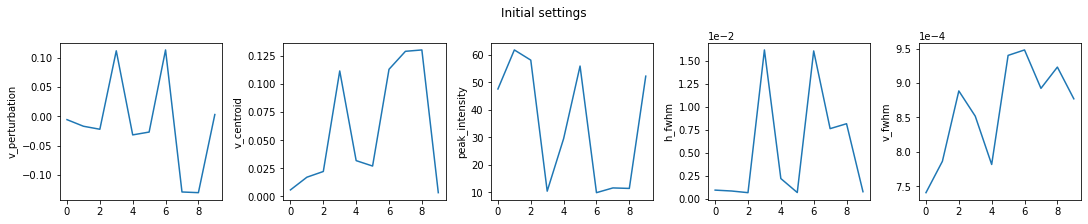

In [17]:
fig, axes = plt.subplots(1, 5, figsize=[15,3], constrained_layout=True)

axes[0].plot(absolute_movements)
axes[0].set_ylabel('v_perturbation')

axes[1].plot(initial_centroids)
axes[1].set_ylabel('v_centroid')

axes[2].plot(initial_peaks)
axes[2].set_ylabel('peak_intensity')

axes[3].plot(initial_h_fwhms)
axes[3].set_ylabel('h_fwhm')
axes[3].ticklabel_format(style='sci', scilimits=(-3, -5))


axes[4].plot(initial_v_fwhms)
axes[4].set_ylabel('v_fwhm')
axes[4].ticklabel_format(style='sci', scilimits=(-3, -5))

fig.suptitle('Initial settings')
fig.savefig(f'{fig_save_path}/hkb_4_initial_metrics.png', bbox_inches='tight')

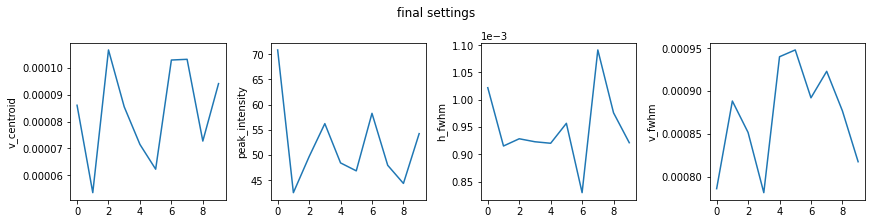

In [18]:
fig, axes = plt.subplots(1, 4, figsize=[12,3], constrained_layout=True)

axes[0].plot(final_centroids)
axes[0].set_ylabel('v_centroid')

axes[1].plot(final_peaks)
axes[1].set_ylabel('peak_intensity')

axes[2].plot(final_h_fwhms)
axes[2].set_ylabel('h_fwhm')
axes[2].ticklabel_format(style='sci', scilimits=(-3, -5))


axes[3].plot(final_v_fwhms)
axes[3].set_ylabel('v_fwhm')
axes[2].ticklabel_format(style='sci', scilimits=(-3, -5))

fig.suptitle('final settings')
fig.savefig(f'{fig_save_path}/hkb_4_final_metrics.png', bbox_inches='tight')

/Applications/Oasys1.2.app/Contents/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """


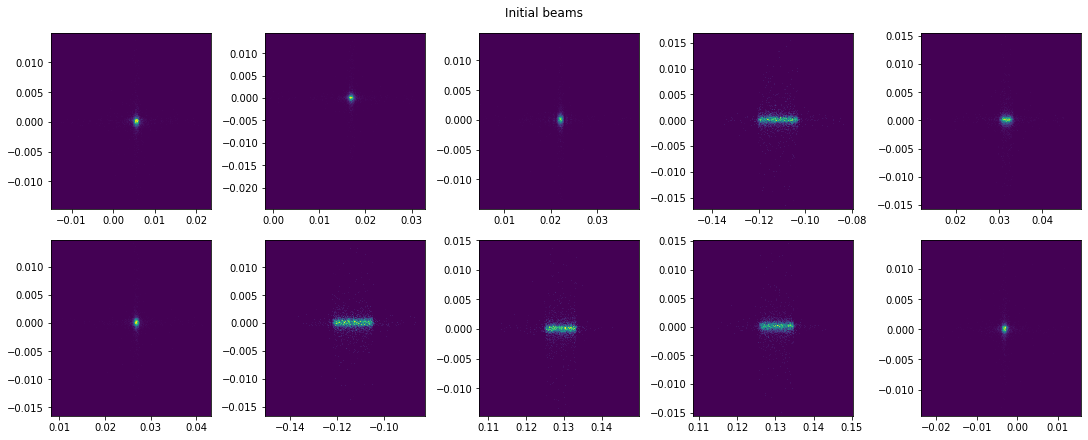

In [19]:
fig, axes = plt.subplots(2, 5, figsize=[15,6], constrained_layout=True)

axes_flat = axes.flatten()
for ix, h in enumerate(initial_hists):
    axes_flat[ix].pcolormesh(h.hh, h.vv, h.data_2D.T)
    
    
fig.suptitle('Initial beams')
fig.savefig(f'{fig_save_path}/hkb_4_initial_beams.png', bbox_inches='tight')

/Applications/Oasys1.2.app/Contents/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """


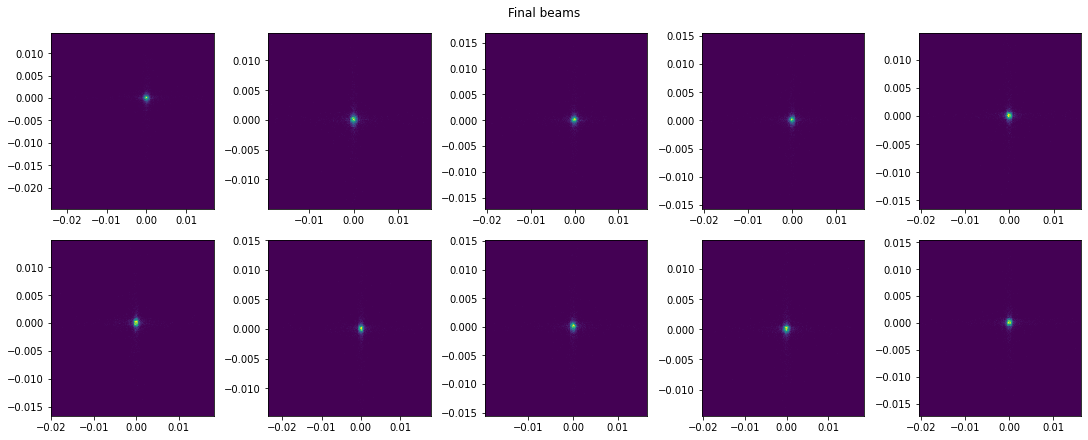

In [20]:
fig, axes = plt.subplots(2, 5, figsize=[15,6], constrained_layout=True)

axes_flat = axes.flatten()
for ix, h in enumerate(final_hists):
    axes_flat[ix].pcolormesh(h.hh, h.vv, h.data_2D.T)
    
    
fig.suptitle('Final beams')
fig.savefig(f'{fig_save_path}/hkb_4_final_beams.png', bbox_inches='tight')

In [21]:
clean_up()